In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

## Упражнение 11.1
1. С помощью библиотеки OpenCV считайте изображение и преобразуйте в градации серого:

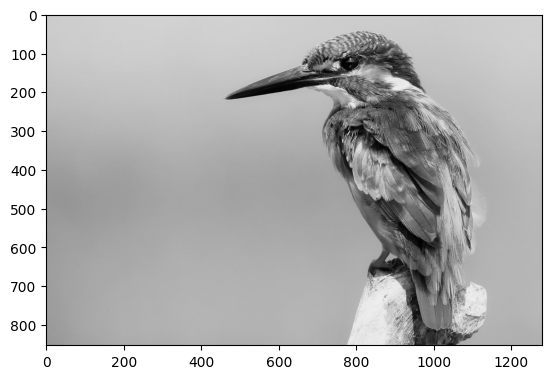

In [14]:
IMG_PATH = "data\\Task_4\\1.jpg"
image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

2. Выполните дискретное преобразование Фурье. Определите компоненту полученного преобразования, находящуюся на пересечении `177`
 строки и `439` столбца.

In [15]:
f = np.fft.fft2(image)
component = f[177][439]
print("Вещественная часть: %.2f" % component.real)
print("Мнимая часть: %.2f" % component.imag)

Вещественная часть: 1978.18
Мнимая часть: 8949.04


3. Переместите компоненту, отвечающую нулевой частоте `f[0][0]`
, в центр и замените все элементы матрицы их модулями — амплитудами.

In [18]:
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
print("min: %.2f" % np.min(magnitude_spectrum))
print("max: %.2f" % np.max(magnitude_spectrum))

min: 13.02
max: 182713605.00


4. Примените логарифмическое шкалирование.

Определите различие в полученных значениях (разность между наибольшим и наименьшим) с точностью до сотых:

In [29]:
magnitude_spectrum = np.log(1+np.abs(fshift))
print("diff: %.2f" % (magnitude_spectrum.max() - magnitude_spectrum.min()))

diff: 12.62


5. Занулите амплитуду основных низких частот — матрица размера `80×80`
 в центре изображения (плюс/минус `40` пикселей от центра). За точку центра следует выбрать результат целочисленного деления на `2` ширины и высота изображения.

Определите амплитуду обратного преобразования на пересечении `642`
 строки и `404`
 столбца матрицы с точностью до сотых:

In [36]:
center_x, center_y = fshift.shape[1] // 2, fshift.shape[0] // 2
step = 40
fshift[center_y-step : center_y+step, center_x-step : center_x+step] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
print("A: %.2f" % img_back[642][404])

A: 0.21


## Упражнение 11.2
1. С помощью библиотеки OpenCV считайте изображение:

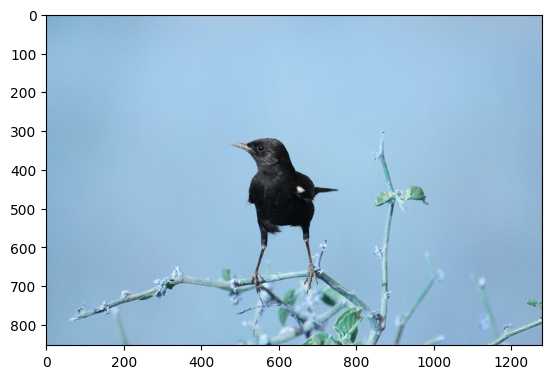

In [45]:
IMG_PATH_2 = "data\\Task_4\\2.jpg"
image_2 = cv2.imread(IMG_PATH)
plt.imshow(image_2, cmap='gray')

2. Постройте градиенты изображений с помощью оператора Лапласа.
Определите сумму интенсивностей всех пикселей по всем трем каналам полученного изображения:

11184970


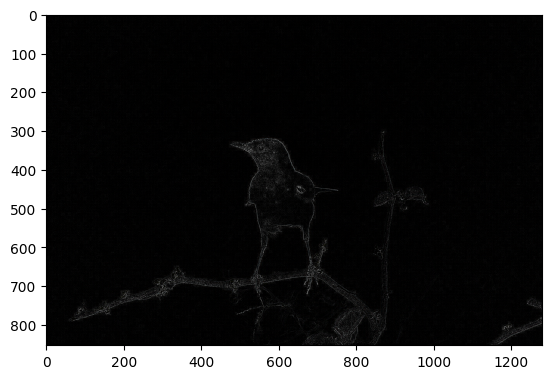

In [48]:
laplacian = cv2.Laplacian(image_2, -1)
print(laplacian.sum())

3. Примените алгоритм детектора краев Кенни.
Определите сумму интенсивностей всех пикселей полученного изображения: 

In [51]:
canny = cv2.Canny(image_2, 100, 200)
print(canny.sum())

5425635
